In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython import display as ICD
from nba_api.stats.endpoints import leaguegamefinder, boxscoreplayertrackv2, playercareerstats, teamplayerdashboard, leaguestandings
from nba_api.stats.static import players, teams

import numpy as np
import statsmodels.api as sm

import time

import warnings
warnings.filterwarnings("ignore")

# Team Standings

In [2]:
all_games = leaguegamefinder.LeagueGameFinder().get_data_frames()[0]

In [3]:
mapping = {'DEN':"1610612743", 
           'SAS':"1610612759", 
           'IND':"1610612754", 
           'MEM':"1610612763", 
           'NOP':"1610612740", 
           'CHI':"1610612741", 
           'MIN':"1610612750", 
           'MIA':"1610612748", 
           'ATL':"1610612737",
           'ORL':"1610612753", 
           'SAC':"1610612758", 
           'UTA':"1610612762", 
           'CHA':"1610612766", 
           'WAS':"1610612764", 
           'HOU':"1610612745", 
           'PHX':"1610612756", 
           'OKC':"1610612760", 
           'POR':"1610612757",
           'LAC':"1610612746", 
           'GSW':"1610612744", 
           'PHI':"1610612755", 
           'LAL':"1610612747", 
           'BKN':"1610612751", 
           'TOR':"1610612761", 
           'BOS':"1610612738", 
           'MIL':"1610612749", 
           'DET':"1610612765",
           'CLE':"1610612739", 
           'NYK':"1610612752"}

In [4]:
league_standings = leaguestandings.LeagueStandings().get_data_frames()[0]
league_standings[['TeamName','PointsPG','OppPointsPG']]

,TeamName,PointsPG,OppPointsPG
0,Lakers,113.2,107.0
1,Bucks,118.9,108.3
2,Raptors,112.5,106.3
3,Clippers,116.4,110.0
4,Celtics,113.9,107.5
5,Nuggets,111.2,108.6
6,Rockets,118.5,114.6
7,Heat,112.3,109.2
8,Pacers,109.7,107.7
9,Thunder,110.6,108.1


# Getting Team 2019 Game Data

In [5]:
nba_teams = teams.get_teams()
mavs_id = [team for team in nba_teams
         if team['full_name'] == 'Dallas Mavericks'][0]['id']
opponent_id = [team for team in nba_teams
         if team['full_name'] == 'Utah Jazz'][0]['id']

In [6]:
from nba_api.stats.endpoints import teamplayerdashboard
mavs_season_stats = teamplayerdashboard.TeamPlayerDashboard(mavs_id).get_data_frames()[1]
mavs_season_stats['PPG'] = mavs_season_stats['PTS']/mavs_season_stats['GP']
mavs_season_stats['MPG'] = mavs_season_stats['MIN']/mavs_season_stats['GP']
mavs_season_stats

,GROUP_SET,PLAYER_ID,PLAYER_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,PPG,MPG
0,Players,1628499,Antonius Cleveland,9,5,4,0.556,29.171667,2,8,0.250,0,2,0.000,3,4,0.750,0,3,3,0,1,1,1,1,4,2,7,-7,15.6,0,0,17,17,4,14,18,17,17,17,16,17,16,17,17,14,18,18,18,18,18,18,17,4,2,17,17,18,18,10,2,0.777778,3.241296
1,Players,1626246,Boban Marjanovic,41,20,21,0.488,360.408333,104,185,0.562,4,15,0.267,37,50,0.740,59,108,167,15,26,7,8,13,53,46,249,66,490.9,5,0,10,11,10,18,12,11,11,3,15,15,14,11,10,15,7,11,8,12,11,12,10,10,9,10,11,9,11,3,2,6.073171,8.790447
2,Players,201584,Courtney Lee,24,15,9,0.625,345.488333,40,82,0.488,21,47,0.447,6,7,0.857,7,25,32,12,11,18,6,0,33,5,107,39,224.4,0,0,13,12,7,2,13,13,13,5,11,12,1,14,15,4,14,15,15,14,13,10,11,1,8,14,13,10,13,10,2,4.458333,14.395347
3,Players,1626153,Delon Wright,70,41,29,0.586,1505.790000,186,399,0.466,47,125,0.376,76,96,0.792,68,204,272,233,70,80,22,29,89,90,495,38,1406.9,1,0,2,1,17,10,7,7,7,7,7,8,7,7,6,12,6,5,5,2,3,1,4,15,12,7,7,11,6,7,2,7.071429,21.511286
4,Players,1627827,Dorian Finney-Smith,69,40,29,0.580,2078.965000,237,513,0.462,111,297,0.374,78,108,0.722,144,257,401,112,69,45,39,32,173,88,663,263,1495.2,5,0,3,3,17,11,1,5,5,9,6,6,8,4,5,16,1,4,3,6,4,3,3,16,18,8,5,3,4,3,2,9.608696,30.129928
5,Players,203939,Dwight Powell,40,25,15,0.625,1060.538333,146,229,0.638,10,39,0.256,74,111,0.667,75,152,227,59,36,34,22,13,102,116,376,195,868.9,1,0,11,10,9,2,8,9,10,2,14,13,15,8,4,17,5,7,6,10,9,7,4,10,13,5,9,5,9,7,2,9.400000,26.513458
6,Players,200826,J.J. Barea,27,14,13,0.519,404.481667,74,182,0.407,29,76,0.382,18,20,0.900,10,39,49,100,35,5,2,7,25,38,195,30,389.8,0,0,12,13,8,16,11,12,12,14,10,10,6,12,12,2,13,13,13,8,10,13,15,8,7,12,12,13,12,10,2,7.222222,14.980802
7,Players,1628973,Jalen Brunson,57,34,23,0.596,1022.073333,181,388,0.466,43,120,0.358,61,75,0.813,22,112,134,188,66,22,4,11,74,118,466,172,920.8,2,0,8,8,11,7,9,8,8,6,9,9,10,9,9,9,11,10,11,3,6,9,13,9,11,4,8,6,8,5,2,8.175439,17.931111
8,Players,1629729,Josh Reaves,2,1,1,0.500,1.485000,0,1,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,-5,0.0,0,0,19,19,1,17,19,19,19,19,16,19,16,19,19,19,18,19,19,18,19,19,18,1,1,19,19,16,19,10,2,0.000000,0.742500
9,Players,1628382,Justin Jackson,62,38,24,0.613,984.080000,129,324,0.398,47,158,0.297,38,46,0.826,27,121,148,51,13,15,10,14,62,42,343,35,659.1,0,0,5,5,13,4,10,10,9,15,7,7,13,10,11,7,8,8,9,11,12,11,8,13,10,11,10,12,10,10,2,5.532258,15.872258


In [7]:
opponent_season_stats = teamplayerdashboard.TeamPlayerDashboard(opponent_id).get_data_frames()[1]
opponent_season_stats['PPG'] = opponent_season_stats['PTS']/opponent_season_stats['GP']
opponent_season_stats['MPG'] = opponent_season_stats['MIN']/opponent_season_stats['GP']

opponent_season_stats

,GROUP_SET,PLAYER_ID,PLAYER_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,PPG,MPG
0,Players,202711,Bojan Bogdanovic,63,41,22,0.651,2082.810000,418,935,0.447,189,457,0.414,250,277,0.903,39,220,259,131,159,34,7,72,110,195,1275,267,1746.3,0,0,6,5,15,2,4,2,2,7,1,2,4,3,3,4,4,5,5,5,2,6,10,20,15,3,2,2,3,6,1,20.238095,33.060476
1,Players,203957,Dante Exum,11,5,6,0.455,83.318333,10,23,0.435,2,6,0.333,2,2,1.000,3,9,12,7,10,1,2,3,8,3,24,-16,47.9,0,0,15,15,6,18,15,14,14,10,12,13,13,16,16,1,15,16,17,13,13,15,14,8,6,15,15,16,14,6,1,2.181818,7.574394
2,Players,1628378,Donovan Mitchell,68,42,26,0.618,2352.633333,599,1337,0.448,170,469,0.362,276,320,0.863,53,247,300,291,184,70,14,48,171,263,1644,112,2508.5,1,0,3,3,18,9,1,1,1,6,2,1,10,1,2,6,3,3,3,2,1,1,4,18,18,2,1,5,2,4,1,24.176471,34.597549
3,Players,202334,Ed Davis,26,15,11,0.577,279.755000,14,36,0.389,0,0,0.000,5,11,0.455,29,68,97,10,13,10,9,5,57,19,33,-101,208.4,0,0,12,12,9,13,12,12,12,14,16,19,16,13,12,18,6,11,11,12,12,12,8,9,10,12,12,19,12,6,1,1.269231,10.759808
4,Players,1626144,Emmanuel Mudiay,53,34,19,0.642,822.780000,145,315,0.460,28,83,0.337,63,83,0.759,17,105,122,112,72,23,10,23,68,77,381,-24,722.4,0,0,8,8,12,3,9,8,8,5,9,9,12,6,6,13,10,9,8,6,6,8,5,16,11,6,8,17,8,6,1,7.188679,15.524151
5,Players,1627777,Georges Niang,64,40,24,0.625,886.441667,132,307,0.430,83,213,0.390,19,22,0.864,14,108,122,41,29,18,5,9,74,24,366,-64,613.9,0,0,5,6,16,5,8,9,9,11,7,7,6,11,11,5,11,8,8,9,9,9,11,10,13,11,9,18,10,6,1,5.718750,13.850651
6,Players,1629714,Jarrell Brantley,7,2,5,0.286,44.313333,3,8,0.375,2,4,0.500,0,0,0.000,1,12,13,4,4,2,3,0,4,0,8,-7,40.6,0,0,18,19,5,19,17,17,17,16,12,14,2,19,19,19,18,14,15,16,16,14,13,1,5,19,17,12,17,6,1,1.142857,6.330476
7,Players,201145,Jeff Green,30,18,12,0.600,553.250000,75,195,0.385,34,104,0.327,49,63,0.778,14,67,81,20,27,12,10,10,46,47,233,-107,399.2,0,0,11,11,10,12,11,11,10,15,8,8,14,8,8,11,11,12,12,10,11,11,5,11,9,9,11,20,11,6,1,7.766667,18.441667
8,Players,204060,Joe Ingles,70,43,27,0.614,2111.076667,242,542,0.446,139,345,0.403,74,94,0.787,27,246,273,363,141,63,10,20,152,120,697,212,1647.1,3,0,1,1,20,10,3,4,5,8,3,3,5,5,5,9,8,4,4,1,3,2,5,15,17,5,4,3,4,2,1,9.957143,30.158238
9,Players,203903,Jordan Clarkson,40,25,15,0.625,1010.825000,240,520,0.462,85,238,0.357,61,78,0.782,28,85,113,65,56,29,8,29,72,61,626,65,914.1,0,0,10,10,11,5,7,5,6,4,6,6,11,7,7,10,7,10,10,8,8,7,9,17,12,8,6,6,7,6,1,15.650000,25.270625


In [8]:
# The first DataFrame of those returned is what we want.
curr_mavs_season = leaguegamefinder.LeagueGameFinder(team_id_nullable=mavs_id).get_data_frames()[0]
opponent_season = leaguegamefinder.LeagueGameFinder(team_id_nullable=opponent_id).get_data_frames()[0]

curr_mavs_season = curr_mavs_season[curr_mavs_season['SEASON_ID'] == "22019"]
opponent_season = opponent_season[opponent_season['SEASON_ID'] == "22019"]

## Variance in Player Rotation
Preseason will have greater variance in player rotations. The goal is to use that to forecast PPG and OPPG

In [9]:
def missing_mins(curr_game_id, team_id, df):
    time.sleep(0.5)
    curr_game = boxscoreplayertrackv2.BoxScorePlayerTrackV2(game_id=curr_game_id).get_data_frames()[0]
    player_game_stats = curr_game[curr_game['TEAM_ID'] == int(team_id)]
    combined = pd.merge(df, player_game_stats, how='left', on='PLAYER_ID')
    missing_mins = combined[(combined['MIN_y'] == "0:00") | (combined['MIN_y'].isna())]['MPG'].sum()
    return missing_mins

In [10]:
def variance(curr_game_id, team_id):
    time.sleep(0.5)
    curr_game = boxscoreplayertrackv2.BoxScorePlayerTrackV2(game_id=curr_game_id).get_data_frames()[0]
    minutes = curr_game[curr_game['TEAM_ID'] == int(team_id)]['MIN']
    minutes = minutes.apply(lambda x: int(x[:-3])*60+int(x[-2:]))
    minutes = minutes[minutes != 0]
    return minutes.var()

In [11]:
def create_table(season_copy, season_stats):
    curr_copy = season_copy[:]
    
    curr_copy['datetime'] = curr_copy['GAME_DATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
    curr_copy['reg_season'] = curr_copy['GAME_DATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d') >= datetime(2019, 10, 22))

    curr_copy['OPTS'] = curr_copy['PTS'] - curr_copy['PLUS_MINUS']
    
    #filtering for only NBA teams
    curr_copy = curr_copy[curr_copy['MATCHUP'].apply(lambda x: x[-3:] in mapping)]
    
    curr_copy['OPP_TEAM_ID'] = curr_copy['MATCHUP'].apply(lambda x: mapping[x[-3:]])
    
    curr_copy['PPG_a'] = curr_copy['TEAM_ID'].apply(lambda x: league_standings[league_standings['TeamID'] == int(x)]['PointsPG'].iloc[0])
    curr_copy['OPPG_a'] = curr_copy['TEAM_ID'].apply(lambda x:league_standings[league_standings['TeamID'] == int(x)]['OppPointsPG'].iloc[0])
    
    curr_copy['PPG_b'] = curr_copy['OPP_TEAM_ID'].apply(lambda x:league_standings[league_standings['TeamID'] == int(x)]['PointsPG'].iloc[0])
    curr_copy['OPPG_b'] = curr_copy['OPP_TEAM_ID'].apply(lambda x:league_standings[league_standings['TeamID'] == int(x)]['OppPointsPG'].iloc[0])

    curr_copy['O_COEF'] = curr_copy['PTS'] / (curr_copy['PPG_a'] + curr_copy['OPPG_b'])
    curr_copy['D_COEF'] = curr_copy['OPTS'] / (curr_copy['PPG_b'] + curr_copy['OPPG_a'])
    
    print('variance')
    curr_copy['VARIANCE'] = curr_copy.apply(lambda x: variance(x['GAME_ID'], x['TEAM_ID']), axis = 1)
    
    print('missing mins')
    curr_copy['MISSING_MINS'] = curr_copy.apply(lambda x: missing_mins(x['GAME_ID'], x['TEAM_ID'], season_stats), axis = 1)
    
    return curr_copy
    

In [12]:
curr_mavs_season_copy = create_table(curr_mavs_season, mavs_season_stats)
curr_mavs_season_copy

variance
missing mins


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,datetime,reg_season,OPTS,OPP_TEAM_ID,PPG_a,OPPG_a,PPG_b,OPPG_b,O_COEF,D_COEF,VARIANCE,MISSING_MINS
0,22019,1610612742,DAL,Dallas Mavericks,0021901284,2020-08-08,DAL vs. MIL,W,264,136,48,115,0.417,17,53,0.321,23,25,0.920,11,43,54,37,6,2,6,26,4.0,2020-08-08,True,132.0,1610612749,117.0,111.5,118.9,108.3,0.603640,0.572917,615150.444444,109.264518
1,22019,1610612742,DAL,Dallas Mavericks,0021901271,2020-08-06,DAL vs. LAC,L,240,111,39,87,0.448,17,48,0.354,16,21,0.762,8,29,37,24,3,4,7,17,-15.0,2020-08-06,True,126.0,1610612746,117.0,111.5,116.4,110.0,0.488987,0.552874,513217.000000,132.596700
2,22019,1610612742,DAL,Dallas Mavericks,0021901257,2020-08-04,DAL @ SAC,W,267,114,33,90,0.367,9,41,0.220,39,50,0.780,17,44,61,22,4,2,17,21,4.0,2020-08-04,True,110.0,1610612758,117.0,111.5,109.7,112.1,0.497599,0.497288,706101.072727,114.374601
3,22019,1610612742,DAL,Dallas Mavericks,0021901249,2020-08-02,DAL @ PHX,L,240,115,38,93,0.409,6,31,0.194,33,37,0.892,10,39,49,22,8,5,8,22,-2.0,2020-08-02,True,117.0,1610612756,117.0,111.5,113.0,113.7,0.498483,0.521158,582489.555556,120.604866
4,22019,1610612742,DAL,Dallas Mavericks,0021901238,2020-07-31,DAL vs. HOU,L,265,149,50,105,0.476,21,49,0.429,28,38,0.737,13,42,55,30,7,4,20,36,-4.0,2020-07-31,True,153.0,1610612745,117.0,111.5,118.5,114.6,0.643351,0.665217,821757.472727,104.732608
8,22019,1610612742,DAL,Dallas Mavericks,0021900973,2020-03-11,DAL vs. DEN,W,240,113,42,92,0.457,12,35,0.343,17,23,0.739,13,39,52,23,9,2,10,14,8.0,2020-03-11,True,105.0,1610612743,117.0,111.5,111.2,108.6,0.500887,0.471486,454069.500000,176.509273
9,22019,1610612742,DAL,Dallas Mavericks,0021900965,2020-03-10,DAL @ SAS,L,240,109,42,92,0.457,17,44,0.386,8,11,0.727,7,35,42,23,8,3,14,19,0.2,2020-03-10,True,108.8,1610612759,117.0,111.5,114.0,115.3,0.469221,0.482483,522427.750000,141.681352
10,22019,1610612742,DAL,Dallas Mavericks,0021900952,2020-03-08,DAL vs. IND,L,240,109,39,91,0.429,14,43,0.326,17,25,0.680,9,33,42,19,7,5,10,17,-3.0,2020-03-08,True,112.0,1610612754,117.0,111.5,109.7,107.7,0.485091,0.506329,683587.777778,144.756118
11,22019,1610612742,DAL,Dallas Mavericks,0021900937,2020-03-06,DAL vs. MEM,W,239,121,45,95,0.474,18,47,0.383,13,17,0.765,13,35,48,30,11,9,10,11,25.0,2020-03-06,True,96.0,1610612763,117.0,111.5,112.6,113.7,0.524491,0.428380,344142.290909,142.047264
12,22019,1610612742,DAL,Dallas Mavericks,0021900923,2020-03-04,DAL vs. NOP,W,264,127,44,95,0.463,22,50,0.440,17,24,0.708,6,43,49,30,6,13,16,17,4.0,2020-03-04,True,123.0,1610612740,117.0,111.5,115.8,117.0,0.542735,0.541135,911390.444444,122.147070


In [13]:
opponent_season_copy = create_table(opponent_season, opponent_season_stats)
opponent_season_copy

variance
missing mins


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,datetime,reg_season,OPTS,OPP_TEAM_ID,PPG_a,OPPG_a,PPG_b,OPPG_b,O_COEF,D_COEF,VARIANCE,MISSING_MINS
0,22019,1610612762,UTA,Utah Jazz,0021901281,2020-08-08,UTA @ DEN,L,288,132,47,105,0.448,22,55,0.400,16,22,0.727,15.0,36.0,51.0,34,6,4,22,30,-2.0,2020-08-08,True,134.0,1610612743,111.2,108.6,111.2,108.6,0.600546,0.609645,938168.000000,110.409162
1,22019,1610612762,UTA,Utah Jazz,0021901274,2020-08-07,UTA @ SAS,L,240,111,38,91,0.418,16,37,0.432,19,24,0.792,10.0,39.0,49.0,25,8,4,15,19,-8.0,2020-08-07,True,119.0,1610612759,111.2,108.6,114.0,115.3,0.490066,0.534591,147911.090909,193.758169
2,22019,1610612762,UTA,Utah Jazz,0021901262,2020-08-05,UTA vs. MEM,W,241,124,38,84,0.452,18,45,0.400,30,33,0.909,11.0,35.0,46.0,25,5,4,17,23,9.0,2020-08-05,True,115.0,1610612763,111.2,108.6,112.6,113.7,0.551356,0.519892,729629.690909,96.599436
3,22019,1610612762,UTA,Utah Jazz,0021901255,2020-08-03,UTA vs. LAL,L,238,108,37,83,0.446,12,43,0.279,22,25,0.880,7.0,35.0,42.0,25,8,3,21,29,-8.0,2020-08-03,True,116.0,1610612747,111.2,108.6,113.2,107.0,0.494959,0.522994,501420.222222,102.659529
4,22019,1610612762,UTA,Utah Jazz,0021901240,2020-08-01,UTA @ OKC,L,240,94,34,87,0.391,8,31,0.258,18,22,0.818,12.0,23.0,35.0,17,11,4,14,21,-16.0,2020-08-01,True,110.0,1610612760,111.2,108.6,110.6,108.1,0.428637,0.501825,370357.636364,89.523395
5,22019,1610612762,UTA,Utah Jazz,0021901231,2020-07-30,UTA @ NOP,W,240,106,37,84,0.440,8,34,0.235,24,28,0.857,12.0,31.0,43.0,17,11,6,20,23,2.0,2020-07-30,True,104.0,1610612740,111.2,108.6,115.8,117.0,0.464505,0.463458,403355.750000,108.291529
9,22019,1610612762,UTA,Utah Jazz,0021900959,2020-03-09,UTA vs. TOR,L,241,92,33,83,0.398,16,43,0.372,10,14,0.714,6.0,28.0,34.0,24,12,4,11,20,-9.0,2020-03-09,True,101.0,1610612761,111.2,108.6,112.5,106.3,0.422989,0.456807,247918.361111,90.755204
10,22019,1610612762,UTA,Utah Jazz,0021900941,2020-03-07,UTA @ DET,W,240,111,40,77,0.519,10,33,0.303,21,28,0.750,9.0,31.0,40.0,17,10,4,9,19,6.0,2020-03-07,True,105.0,1610612765,111.2,108.6,107.2,110.8,0.500000,0.486562,284505.611111,90.755204
11,22019,1610612762,UTA,Utah Jazz,0021900933,2020-03-06,UTA @ BOS,W,241,99,36,80,0.450,17,45,0.378,10,12,0.833,8.0,32.0,40.0,23,8,7,18,19,5.0,2020-03-06,True,94.0,1610612738,111.2,108.6,113.9,107.5,0.452675,0.422472,228848.750000,90.755204
12,22019,1610612762,UTA,Utah Jazz,0021900921,2020-03-04,UTA @ NYK,W,242,112,41,81,0.506,10,36,0.278,20,25,0.800,6.0,31.0,37.0,26,5,5,11,20,8.0,2020-03-04,True,104.0,1610612752,111.2,108.6,105.8,112.3,0.501119,0.485075,601844.909091,61.824535


# Additional Columns
 - Home or Away ( only Away games are relevant in the bubble)
 - days since last game
 - score from last game


In [14]:
curr_mavs_season_copy['HOME'] = curr_mavs_season_copy['MATCHUP'].apply(lambda x: 'vs' in x)
opponent_season_copy['HOME'] = opponent_season_copy['MATCHUP'].apply(lambda x: 'vs' in x)

#days since last game
dates = list(curr_mavs_season_copy['datetime'])
date_diffs = list(pd.Series(dates) - pd.Series(dates[1:] + [dates[len(dates) - 1]]))
for x in range(len(dates)):
    date_diffs[x] = date_diffs[x].days
curr_mavs_season_copy['days_since_game'] = date_diffs

dates = list(opponent_season_copy['datetime'])
date_diffs = list(pd.Series(dates) - pd.Series(dates[1:] + [dates[len(dates) - 1]]))
for x in range(len(dates)):
    date_diffs[x] = date_diffs[x].days
opponent_season_copy['days_since_game'] = date_diffs

# score from last game
score = list(curr_mavs_season_copy['PTS'])
prev_score = list(pd.Series(score[1:] + [score[len(score) - 1]]))
curr_mavs_season_copy['prev_pts'] = prev_score

score = list(curr_mavs_season_copy['OPTS'])
prev_score = list(pd.Series(score[1:] + [score[len(score) - 1]]))
curr_mavs_season_copy['prev_opts'] = prev_score

score = list(opponent_season_copy['PTS'])
prev_score = list(pd.Series(score[1:] + [score[len(score) - 1]]))
opponent_season_copy['prev_pts'] = prev_score

score = list(opponent_season_copy['OPTS'])
prev_score = list(pd.Series(score[1:] + [score[len(score) - 1]]))
opponent_season_copy['prev_opts'] = prev_score

# Bias Boosted Monte Carlo Simulation

In [15]:
curr_mavs_season_copy

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,datetime,reg_season,OPTS,OPP_TEAM_ID,PPG_a,OPPG_a,PPG_b,OPPG_b,O_COEF,D_COEF,VARIANCE,MISSING_MINS,HOME,days_since_game,prev_pts,prev_opts
0,22019,1610612742,DAL,Dallas Mavericks,0021901284,2020-08-08,DAL vs. MIL,W,264,136,48,115,0.417,17,53,0.321,23,25,0.920,11,43,54,37,6,2,6,26,4.0,2020-08-08,True,132.0,1610612749,117.0,111.5,118.9,108.3,0.603640,0.572917,615150.444444,109.264518,True,2,111,126.0
1,22019,1610612742,DAL,Dallas Mavericks,0021901271,2020-08-06,DAL vs. LAC,L,240,111,39,87,0.448,17,48,0.354,16,21,0.762,8,29,37,24,3,4,7,17,-15.0,2020-08-06,True,126.0,1610612746,117.0,111.5,116.4,110.0,0.488987,0.552874,513217.000000,132.596700,True,2,114,110.0
2,22019,1610612742,DAL,Dallas Mavericks,0021901257,2020-08-04,DAL @ SAC,W,267,114,33,90,0.367,9,41,0.220,39,50,0.780,17,44,61,22,4,2,17,21,4.0,2020-08-04,True,110.0,1610612758,117.0,111.5,109.7,112.1,0.497599,0.497288,706101.072727,114.374601,False,2,115,117.0
3,22019,1610612742,DAL,Dallas Mavericks,0021901249,2020-08-02,DAL @ PHX,L,240,115,38,93,0.409,6,31,0.194,33,37,0.892,10,39,49,22,8,5,8,22,-2.0,2020-08-02,True,117.0,1610612756,117.0,111.5,113.0,113.7,0.498483,0.521158,582489.555556,120.604866,False,2,149,153.0
4,22019,1610612742,DAL,Dallas Mavericks,0021901238,2020-07-31,DAL vs. HOU,L,265,149,50,105,0.476,21,49,0.429,28,38,0.737,13,42,55,30,7,4,20,36,-4.0,2020-07-31,True,153.0,1610612745,117.0,111.5,118.5,114.6,0.643351,0.665217,821757.472727,104.732608,True,142,113,105.0
8,22019,1610612742,DAL,Dallas Mavericks,0021900973,2020-03-11,DAL vs. DEN,W,240,113,42,92,0.457,12,35,0.343,17,23,0.739,13,39,52,23,9,2,10,14,8.0,2020-03-11,True,105.0,1610612743,117.0,111.5,111.2,108.6,0.500887,0.471486,454069.500000,176.509273,True,1,109,108.8
9,22019,1610612742,DAL,Dallas Mavericks,0021900965,2020-03-10,DAL @ SAS,L,240,109,42,92,0.457,17,44,0.386,8,11,0.727,7,35,42,23,8,3,14,19,0.2,2020-03-10,True,108.8,1610612759,117.0,111.5,114.0,115.3,0.469221,0.482483,522427.750000,141.681352,False,2,109,112.0
10,22019,1610612742,DAL,Dallas Mavericks,0021900952,2020-03-08,DAL vs. IND,L,240,109,39,91,0.429,14,43,0.326,17,25,0.680,9,33,42,19,7,5,10,17,-3.0,2020-03-08,True,112.0,1610612754,117.0,111.5,109.7,107.7,0.485091,0.506329,683587.777778,144.756118,True,2,121,96.0
11,22019,1610612742,DAL,Dallas Mavericks,0021900937,2020-03-06,DAL vs. MEM,W,239,121,45,95,0.474,18,47,0.383,13,17,0.765,13,35,48,30,11,9,10,11,25.0,2020-03-06,True,96.0,1610612763,117.0,111.5,112.6,113.7,0.524491,0.428380,344142.290909,142.047264,True,2,127,123.0
12,22019,1610612742,DAL,Dallas Mavericks,0021900923,2020-03-04,DAL vs. NOP,W,264,127,44,95,0.463,22,50,0.440,17,24,0.708,6,43,49,30,6,13,16,17,4.0,2020-03-04,True,123.0,1610612740,117.0,111.5,115.8,117.0,0.542735,0.541135,911390.444444,122.147070,True,2,107,109.0


In [16]:
import random
from sklearn.linear_model import LinearRegression
def get_rand_sample(df, col_name, col_value, sample_col_name, N):
    weights = df[col_name].apply(lambda x: 1/abs(x-col_value) if x != col_value else 1/abs(x-0.99*col_value))
    to_return = random.choices(population=list(df[sample_col_name]), 
                          weights=weights,
                          k=N)
#     plt.hist(to_return, bins = 30)
#     plt.title(col_name + " " + sample_col_name)
#     plt.show()
    return to_return

In [17]:
pts_cols = ['MISSING_MINS','prev_pts','OPPG_b']
opts_cols = ['MISSING_MINS','prev_opts','PPG_b']

pts_cols_rename = [x + '_PTS' for x in pts_cols]
opts_cols_rename = [x + '_OPTS' for x in opts_cols]

In [18]:
def get_coefs(df, col_names, col_renames, pred_metric):
    predicted_scores = pd.DataFrame()
    predicted_scores[pred_metric] = df[pred_metric]
    for x in col_names:
        predicted_scores[x+'_'+pred_metric] = df[x].apply(lambda a: sum(get_rand_sample(df, x, a, pred_metric, 10000))/10000)

    X = predicted_scores[col_renames]
    y = predicted_scores[pred_metric]

    lrc = LinearRegression().fit(X,y)
    predicted_scores['PRED_SCORE'] = predicted_scores[col_renames].apply(lambda x: lrc.predict([x])[0], axis = 1)
    predicted_scores['DIFF_SCORE'] = predicted_scores[pred_metric] - predicted_scores['PRED_SCORE']
    ICD.display(predicted_scores)
    ICD.display(pd.DataFrame(lrc.coef_, index=pts_cols_rename,columns=[lrc.score(X,y)]))

In [19]:
print("Mavericks PTS")
get_coefs(curr_mavs_season_copy, pts_cols, pts_cols_rename, 'PTS')
get_coefs(curr_mavs_season_copy, opts_cols, opts_cols_rename, 'OPTS')

print("Opponent PTS")
get_coefs(opponent_season_copy, pts_cols, pts_cols_rename, 'PTS')
get_coefs(opponent_season_copy, opts_cols, opts_cols_rename, 'OPTS')



Mavericks PTS


,PTS,MISSING_MINS_PTS,prev_pts_PTS,OPPG_b_PTS,PRED_SCORE,DIFF_SCORE
0,111,113.7505,116.4990,114.8570,114.062896,-3.062896
1,114,112.2601,116.2630,113.7617,111.315499,2.684501
2,115,115.7321,116.3413,120.1467,120.798610,-5.798610
3,149,121.2330,116.1228,123.6626,128.081651,20.918349
7,113,114.7998,116.5620,112.8645,112.840544,0.159456
8,109,111.6898,116.5871,123.9648,122.434720,-13.434720
9,109,112.9068,115.7385,111.9844,108.790297,0.209703
10,121,111.1816,116.5052,116.5616,114.018728,6.981272
11,127,117.8947,116.2225,118.0845,119.929295,7.070705
12,107,112.2956,116.0472,112.3934,109.431170,-2.431170


,0.346148
MISSING_MINS_PTS,0.727975
prev_pts_PTS,2.108313
OPPG_b_PTS,1.063508


,OPTS,MISSING_MINS_OPTS,prev_opts_OPTS,PPG_b_OPTS,PRED_SCORE,DIFF_SCORE
0,126.0,118.25696,111.23818,109.78940,119.003159,6.996841
1,110.0,111.38012,109.85982,106.73284,108.463435,1.536565
2,117.0,113.42254,111.84144,111.41202,115.267412,1.732588
3,153.0,115.79748,114.19468,113.31468,121.631987,31.368013
7,105.0,108.60922,110.93808,106.40498,106.663465,-1.663465
8,108.8,107.90518,110.25400,112.01724,107.600767,1.199233
9,112.0,109.07724,113.69924,109.19976,111.880896,0.119104
10,96.0,109.15436,109.62596,113.65414,108.912139,-12.912139
11,123.0,113.99788,110.19032,112.16894,114.175427,8.824573
12,109.0,109.51212,106.06454,106.72170,101.709219,7.290781


,0.371544
MISSING_MINS_PTS,1.080814
prev_pts_PTS,1.246335
OPPG_b_PTS,0.454511


Opponent PTS


,PTS,MISSING_MINS_PTS,prev_pts_PTS,OPPG_b_PTS,PRED_SCORE,DIFF_SCORE
0,130,123.3041,122.2928,115.7332,129.557667,0.442333
1,116,126.6149,122.3769,123.5096,131.631028,-15.631028
2,116,118.4304,119.3392,119.8558,120.373592,-4.373592
3,119,117.2652,114.0969,113.6277,110.868284,8.131716
7,95,107.3915,115.7904,116.0047,106.057555,-11.057555
8,131,118.8893,117.8789,121.2572,118.080368,12.919632
9,103,115.6713,119.3303,114.6820,118.649591,-15.649591
10,119,116.9457,109.2120,114.4621,102.078140,16.921860
11,89,119.0609,109.2095,115.7700,103.591848,-14.591848
12,93,114.7022,117.2393,118.7621,113.957668,-20.957668


,0.370636
MISSING_MINS_PTS,0.766117
prev_pts_PTS,1.735965
OPPG_b_PTS,-0.078326


,OPTS,MISSING_MINS_OPTS,prev_opts_OPTS,PPG_b_OPTS,PRED_SCORE,DIFF_SCORE
0,116.0,108.01320,109.11138,108.20444,111.187376,4.812624
1,119.0,96.74732,107.94896,110.65254,104.855701,14.144299
2,120.0,107.98038,108.48788,110.16992,112.424956,7.575044
3,112.0,108.38086,108.02754,110.29824,112.110486,-0.110486
7,109.0,108.36380,107.66074,107.43924,108.277025,0.722975
8,140.0,111.50450,110.12430,109.71754,116.751578,23.248422
9,113.0,108.89928,107.24142,109.24558,110.021025,2.978975
10,100.0,104.73418,107.78308,107.08326,105.712991,-5.712991
11,105.0,100.60316,103.25000,108.48878,97.547992,7.452008
12,85.0,103.33764,103.18218,103.05874,93.042257,-8.042257


,0.206994
MISSING_MINS_PTS,0.647659
prev_pts_PTS,1.563340
OPPG_b_PTS,1.136404


In [20]:
def get_predictions(df, col_names, col_renames, pred_metric, feature_vector):
    predicted_scores = pd.DataFrame()
    predicted_scores[pred_metric] = df[pred_metric]
    for x in col_names:
        predicted_scores[x+'_'+pred_metric] = df[x].apply(lambda a: sum(get_rand_sample(df, x, a, pred_metric, 10000))/10000)

    X = predicted_scores[col_renames]
    y = predicted_scores[pred_metric]

    lrc = LinearRegression().fit(X,y)
    for x in range(len(feature_vector)):
        feature_vector[x] = sum(get_rand_sample(df, col_names[x], feature_vector[x], pred_metric, 10000))/10000
    print(feature_vector)
    return lrc.predict([feature_vector])[0]

In [21]:
print("Mavericks")
print('Mavericks PTS: \t' + str(get_predictions(curr_mavs_season_copy, pts_cols, pts_cols_rename, 'PTS',[109, 136, 108.6])))
print('Mavericks OPTS:\t' + str(get_predictions(curr_mavs_season_copy, opts_cols, opts_cols_rename, 'OPTS', [109, 132, 111.2])))

print("Opponent")
print('Opponent PTS:  \t' + str(get_predictions(opponent_season_copy, pts_cols, pts_cols_rename, 'PTS', [110, 132, 110.9])))
print('Opponent OPTS: \t' + str(get_predictions(opponent_season_copy, opts_cols, opts_cols_rename, 'OPTS', [110, 134, 116.8])))




Mavericks
[124.7048, 112.1626, 114.4508]
Mavericks PTS: 	114.10818906709028
[118.6372799999997, 112.14633999999957, 108.00533999999838]
Mavericks OPTS:	118.36654252275054
Opponent
[117.8431, 113.6676, 107.2217]
Opponent PTS:  	121.8969465157902
[115.45830000000002, 108.15330000000003, 108.26258000000031]
Opponent OPTS: 	117.1623134273616


In [27]:
def get_confidence(df, col_names, col_renames, pred_metric, feature_vector, score):
    predicted_scores = pd.DataFrame()
    predicted_scores[pred_metric] = df[pred_metric]
    for x in col_names:
        predicted_scores[x+'_'+pred_metric] = df[x].apply(lambda a: sum(get_rand_sample(df, x, a, pred_metric, 10000))/10000)

    X = predicted_scores[col_renames]
    y = predicted_scores[pred_metric]

    lrc = LinearRegression().fit(X,y)
    for x in range(len(feature_vector)):
        vals = np.array(get_rand_sample(df, col_names[x], feature_vector[x], pred_metric, 10000))
        feature_vector[x] = len(vals[np.where(vals <= score)])/10000
    return feature_vector

print('Mavericks PTS: \t' + str(get_confidence(curr_mavs_season_copy, pts_cols, pts_cols_rename, 'PTS',[133.066001, 125, 118.7], 121)))
print('Opponent PTS:  \t' + str(get_confidence(opponent_season_copy, opts_cols, opts_cols_rename, 'OPTS', [51.343345, 130, 110.9], 121)))





Mavericks PTS: 	[1.0, 0.7399, 0.6838]
Opponent PTS:  	[1.0, 0.7681, 0.8613]


In [24]:
confidence = [0.7709, 0.7007, 0.7721, 0.8576]
print(sum(confidence)/len(confidence))

0.775325


Mavericks PTS: 	None
Opponent OPTS: 	None


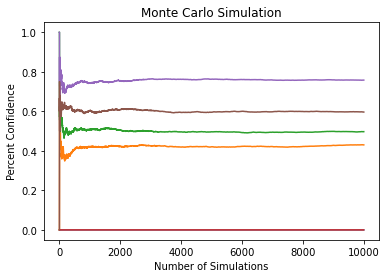

In [35]:
def get_graph(df, col_names, col_renames, pred_metric, feature_vector, score):
    predicted_scores = pd.DataFrame()
    predicted_scores[pred_metric] = df[pred_metric]
    for x in col_names:
        predicted_scores[x+'_'+pred_metric] = df[x].apply(lambda a: sum(get_rand_sample(df, x, a, pred_metric, 10000))/10000)

    X = predicted_scores[col_renames]
    y = predicted_scores[pred_metric]

    lrc = LinearRegression().fit(X,y)
    for x in range(len(feature_vector)):
        vals = pd.Series(get_rand_sample(df, col_names[x], feature_vector[x], pred_metric, 10000))
        vals = (vals <= score).astype(int).cumsum()
        for x in range(len(vals)):
            vals.iloc[x] = vals.iloc[x] / (x+1)
        vals.plot()
    return
print('Mavericks PTS: \t' + str(get_graph(curr_mavs_season_copy, pts_cols, pts_cols_rename, 'PTS',[114.843903, 114, 109.6], 113)))
print('Opponent OPTS: \t' + str(get_graph(opponent_season_copy, opts_cols, opts_cols_rename, 'OPTS', [118.619597, 117, 116.8], 113)))

plt.title('Monte Carlo Simulation')
plt.ylabel('Percent Confidence')
plt.xlabel('Number of Simulations')
plt.show()





In [49]:
suns_pts = [112.20083999999999, 109.82131999999946, 110.75009999999965,124.3034, 110.9585, 111.0285]
mavs_pts = [117.4595, 116.5454, 120.3055, 112.16973999999999, 112.66921999999997, 115.97509999999967]
print("Mavs PTS: ", sum(mavs_pts)/6)
print("Suns PTS: ", sum(suns_pts)/6)

Mavs PTS:  115.85407666666661
Suns PTS:  113.17710999999986
